# [定义目标](http://localhost:8888/notebooks/Data/My_Road/%E5%AE%9A%E4%B9%89%E7%9B%AE%E6%A0%87.ipynb)

泰坦尼克号之灾是一份经典的kaggle竞赛题.关键在于对数据的清洗工作,学习这份数据,帮助你提升对数据的熟悉程度

本案例来源于[kaggle泰坦尼克之灾竞赛中一篇文章](https://www.kaggle.com/samsonqian/titanic-guide-with-sklearn-and-eda)

# [数据获取](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E8%8E%B7%E5%8F%96.ipynb)

In [8]:
#-*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

* 获取训练数据

In [3]:
data_train = pd.read_csv('Kaggle_Titanic/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* 获取测试数据

In [4]:
data_test = pd.read_csv('Kaggle_Titanic/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# [数据理解](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E6%8E%A2%E7%B4%A2.ipynb)

* 查看训练数据的信息

In [5]:
print(data_train.info())
print(data_train.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


* <font color=red>各特征详情</font>

    PassengerId    乘客ID<br>
    Survived       获救与否(0死亡,1生存)<br>
    Pclass         乘客等级(1/2/3等舱位)<br>
    Name           乘客姓名<br>
    Sex            性别<br>
    Age            年龄<br>
    SibSp          堂兄弟/妹个数<br>
    Parch          父母与小孩个数<br>
    Ticket         船票信息<br>
    Fare           票价<br>
    Cabin          客舱<br>
    Embarked       登船港口
* <font color=red>一共有12个特征: 'PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'</font>
* <font color=red>数值型有: PassengerId Survived Pclass Age SibSp Parch Fare</font>
* <font color=red>离散型有: Name Sex Cabin Ticket Embarked</font>
* <font color=red>第一印象有价值的信息: Survived Pclass Sex Age Cabin</font>
* <font color=red>第一印象没有价值的信息: PassengerId</font>
* <font color=red>带有缺失值的信息: Age Cabin Embarked(可忽略)</font>

* 查看各个特征的维度

In [6]:
unique_count_df = pd.Series()
for col in data_train.columns:
    unique_count_df[col] = len(data_train[col].unique())
unique_count_df

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

* <font color=red>由上可以明显看到,PassengerId Name Ticket没有明显区分度</font>

* 查看各维度缺失量

In [7]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(data_train, data_test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* <font color=red>由上述可知,年龄Age和客舱Cabin缺失值严重</font>

* 查看训练数据的分布

In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* <font color=red>Survived:仅有38.38%的人获救</font>
* <font color=red>Pclass:有一半以上是三等舱,一等舱人数少</font>
* <font color=red>Age:年龄集中在20-40岁之间</font>
* <font color=red>Fare:票价差异巨大</font>

* 查看Pclass的分布

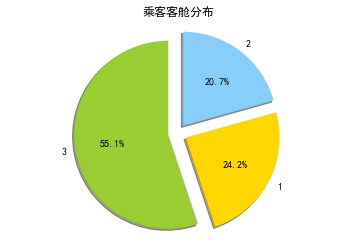

In [44]:
import matplotlib.pyplot as plt
Pclass_Series = data_train.Pclass.value_counts()/ data_train.Pclass.count()
labels = list(Pclass_Series.index)
sizes = list(Pclass_Series.values)
colors = ['yellowgreen', 'gold', 'lightskyblue'] # 每一块的颜色
explode = (0.1, 0.1, 0.1,) # 突出显示,这里仅仅突出显示第二块(即'Hogs')

plt.pie(sizes, explode=explode, labels=labels, \
        colors=colors, autopct='%1.1f%%', \
        shadow=True, startangle=90, pctdistance=0.6) 
# labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%1.1f%%表示小数有一位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，90，表示从90开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
plt.title(u"乘客客舱分布")
plt.axis('equal') # 显示为圆(避免比例压缩为椭圆)
plt.show()


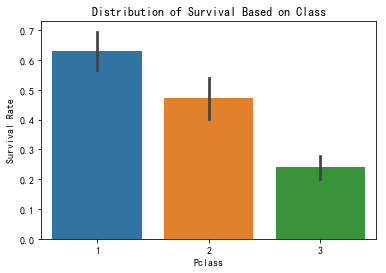

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [24]:
sns.barplot(x="Pclass", y="Survived", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = data_train[data_train.Pclass == 1]["Survived"].sum()
total_survived_two = data_train[data_train.Pclass == 2]["Survived"].sum()
total_survived_three = data_train[data_train.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

* 查看Pclass和Sex两者约束下的生还情况

Text(0.5,1,'Survival Rates Based on Gender and Class')

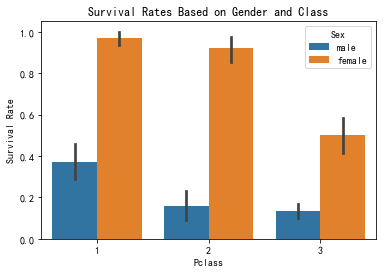

In [25]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

* <font color=red>可以看出,各舱素质都比较高,礼让妇女</font>

Text(0.5,1,'Survival Rates Based on Gender and Class')

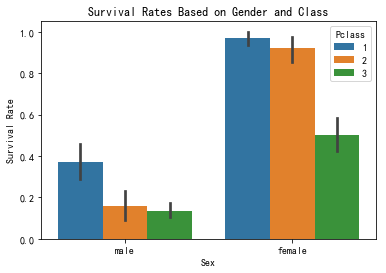

In [26]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

* <font color=red>不论是男性还是女性,1等舱的生还率都高于其他,尤其是男性</font>

In [61]:
Pclass_Survived = data_train.pivot_table(index='Pclass', columns='Survived', aggfunc='count')
Pclass_Survived

Age      Cabin      Embarked      Fare      Name      Parch       \
Survived    0    1     0    1        0    1    0    1    0    1     0    1   
Pclass                                                                       
1          64  122    59  117       80  134   80  136   80  136    80  136   
2          90   83     3   13       97   87   97   87   97   87    97   87   
3         270   85     6    6      372  119  372  119  372  119   372  119   

         PassengerId       Sex      SibSp      Ticket       
Survived           0    1    0    1     0    1      0    1  
Pclass                                                      
1                 80  136   80  136    80  136     80  136  
2                 97   87   97   87    97   87     97   87  
3                372  119  372  119   372  119    372  119

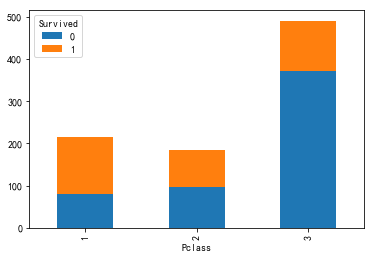

In [64]:
Pclass_Survived.Sex.plot(kind='bar', stacked=True)

* <font color=red>Embarked:缺失的两个数据应该是头等舱乘客,登船口岸应该与头等舱乘客一致</font>
* <font color=red>Age:年龄缺失数据可以通过其所在舱位及获救情况进行补全</font>
* <font color=red>Cabin:客舱缺失数据可以通过其所在舱位及获救情况进行补全</font>
* <font color=red>通过以上数据可以看出,一等舱获救概率明显大于其他舱位</font>

* 查看Age的分布

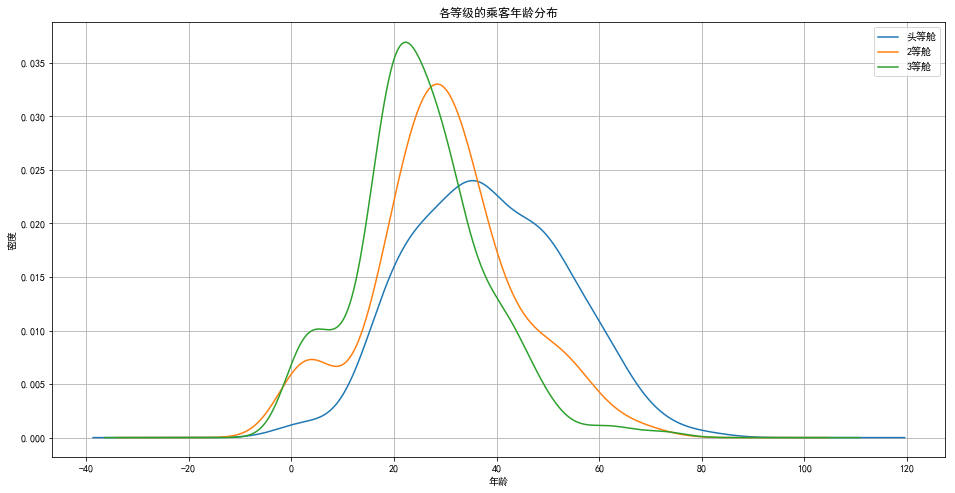

In [85]:
fig = plt.figure(figsize=(16,8))
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.grid(True)
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # 设置图例

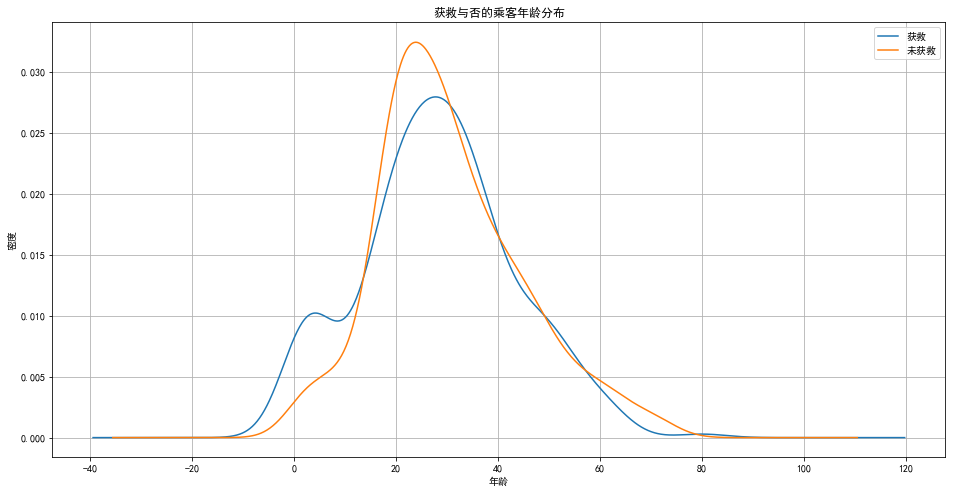

In [6]:
fig = plt.figure(figsize=(16,8))
data_train.Age[data_train.Survived == 1].plot(kind='kde')
data_train.Age[data_train.Survived == 0].plot(kind='kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"获救与否的乘客年龄分布")
plt.grid(True)
plt.legend((u'获救', u'未获救'),loc='best') # 设置图例

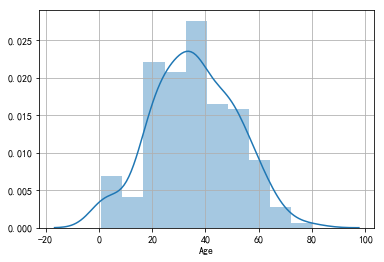

In [12]:
copy = data_train.copy()
copy.dropna(inplace = True)
plt.grid(True)
sns.distplot(copy["Age"])

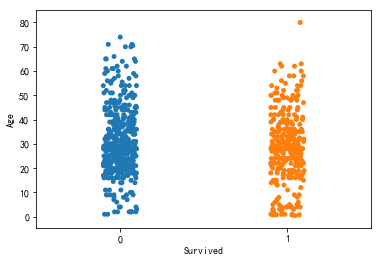

In [33]:
sns.stripplot(x="Survived", y="Age", data=data_train, jitter=True)

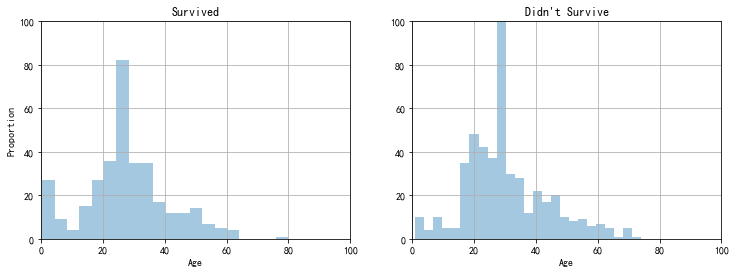

In [31]:
survived_ages = data_train[data_train.Survived == 1]["Age"]
not_survived_ages = data_train[data_train.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
plt.grid(True)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
plt.grid(True)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

* 查看性别Sex特征

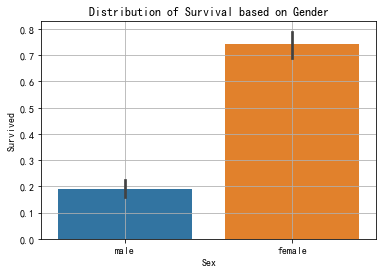

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [22]:
#can ignore the data_test set for now
sns.barplot(x="Sex", y="Survived", data=data_train)
plt.title("Distribution of Survival based on Gender")
plt.grid(True)
plt.show()

total_survived_females = data_train[data_train.Sex == "female"]["Survived"].sum()
total_survived_males = data_train[data_train.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

* <font color=red>由此看来,女性生还的可能性更大,男性更低,素质高</font>

* 查看所有特征两两之间差异

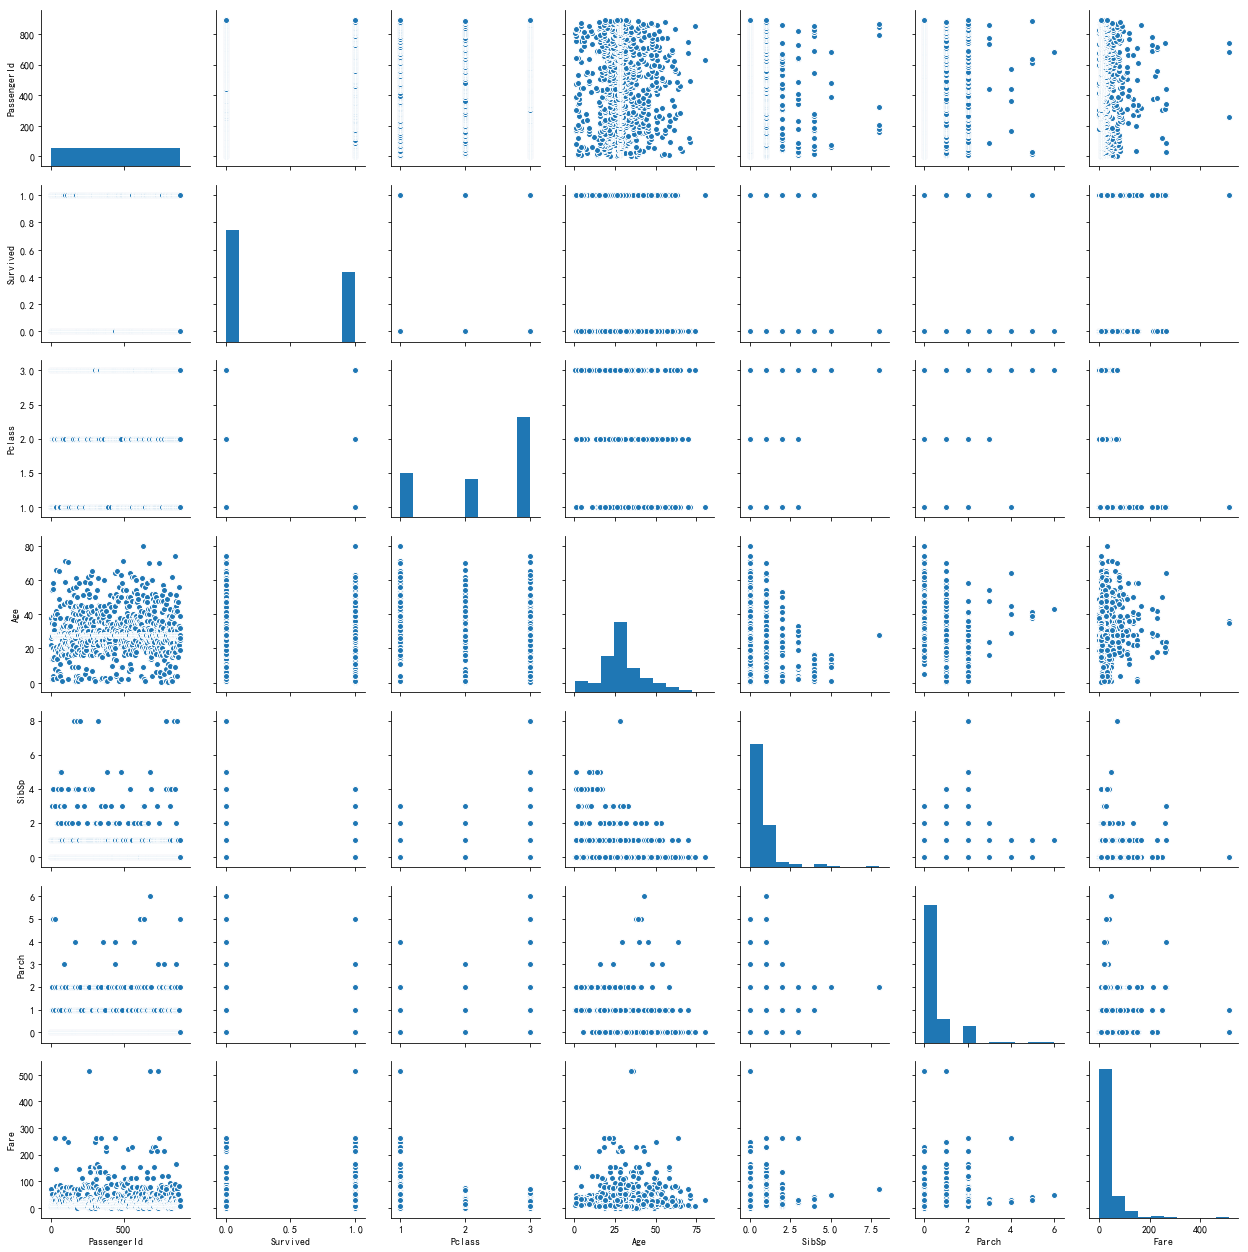

In [36]:
f = sns.pairplot(data_train)
# f.savefig('sns.pairplot.jpg', dpi=100, bbox_inches='tight')

* <font color=red>图片太小?我也这么觉得!</font>

# [特征工程](http://localhost:8888/notebooks/Data/Python%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E4%B8%8E%E6%8C%96%E6%8E%98%E5%AE%9E%E6%88%98/%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb)

* 删除Cabin数据

In [18]:
data_train.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
data_test.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(data_train, data_test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


* 补全年龄信息

In [19]:
#the median will be an acceptable value to place in the NaN cells
data_train["Age"].fillna(data_train["Age"].median(), inplace = True)
data_test["Age"].fillna(data_test["Age"].median(), inplace = True) 
data_train["Embarked"].fillna("S", inplace = True)
data_test["Fare"].fillna(data_test["Fare"].median(), inplace = True)

null_table(data_train, data_test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


* 将性别Sex和登船港口Embarked进行独热向量编码One-Hot-Encoding

In [37]:
data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,39.000,S
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,29.125,Q
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,15.850,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,7.225,C
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,7.250,S


In [39]:
data_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
274,1166,3,"Saade, Mr. Jean Nassr",male,27.0,0,0,7.2250,C
106,998,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,262.3750,C
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,10.5000,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q


* 将不同性别编码为不同值,不同登船港口编码为不同值

In [40]:
data_train.loc[data_train["Sex"] == "male", "Sex"] = 0
data_train.loc[data_train["Sex"] == "female", "Sex"] = 1

data_train.loc[data_train["Embarked"] == "S", "Embarked"] = 0
data_train.loc[data_train["Embarked"] == "C", "Embarked"] = 1
data_train.loc[data_train["Embarked"] == "Q", "Embarked"] = 2

data_test.loc[data_test["Sex"] == "male", "Sex"] = 0
data_test.loc[data_test["Sex"] == "female", "Sex"] = 1

data_test.loc[data_test["Embarked"] == "S", "Embarked"] = 0
data_test.loc[data_test["Embarked"] == "C", "Embarked"] = 1
data_test.loc[data_test["Embarked"] == "Q", "Embarked"] = 2

In [41]:
data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
388,389,0,3,"Sadlier, Mr. Matthew",0,28.0,0,0,7.7292,2
358,359,1,3,"McGovern, Miss. Mary",1,28.0,0,0,7.8792,2
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",1,8.0,0,2,26.2500,0
210,211,0,3,"Ali, Mr. Ahmed",0,24.0,0,0,7.0500,0
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,42.0,0,0,7.6500,0


In [42]:
data_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
167,1059,3,"Ford, Mr. Edward Watson",0,18.0,2,2,34.3750,0
93,985,3,"Guest, Mr. Robert",0,27.0,0,0,8.0500,0
46,938,1,"Chevre, Mr. Paul Romaine",0,45.0,0,0,29.7000,1
102,994,3,"Foley, Mr. William",0,27.0,0,0,7.7500,2
134,1026,3,"Dintcheff, Mr. Valtcho",0,43.0,0,0,7.8958,0


* 将兄妹个数SibSp和父母与小孩个数Parch合并为一个名为家庭成员family_size的新特征

In [44]:
data_train["FamSize"] = data_train["SibSp"] + data_train["Parch"] + 1
data_test["FamSize"] = data_test["SibSp"] + data_test["Parch"] + 1

* 利用'FamSize'特征判断成员是否独自一个人登船

In [45]:
data_train["IsAlone"] = data_train.FamSize.apply(lambda x: 1 if x == 1 else 0)
data_test["IsAlone"] = data_test.FamSize.apply(lambda x: 1 if x == 1 else 0)

* 将姓名中的Ms和Mr提取出来作为特征

In [50]:
for name in data_train["Name"]:
    data_train["Title"] = data_train["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in data_test["Name"]:
    data_test["Title"] = data_test["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [54]:
titles = set(data_train["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Capt', 'Lady', 'Sir', 'Col', 'Master', 'Jonkheer', 'Mme', 'Mlle', 'Major', 'Don', 'Countess', 'Mrs', 'Mr', 'Rev', 'Dr', 'Ms', 'Miss'}


In [55]:
title_list = list(data_train["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[1, 1, 1, 2, 40, 1, 1, 2, 2, 1, 1, 125, 517, 6, 7, 1, 182]


In [56]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

    Frequency    Titles
0           1      Capt
1           1      Lady
2           1       Sir
3           2       Col
4          40    Master
5           1  Jonkheer
6           1       Mme
7           2      Mlle
8           2     Major
9           1       Don
10          1  Countess
11        125       Mrs
12        517        Mr
13          6       Rev
14          7        Dr
15          1        Ms
16        182      Miss


In [57]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

data_train.replace({"Title": title_replacements}, inplace=True)
data_test.replace({"Title": title_replacements}, inplace=True)

data_train.loc[data_train["Title"] == "Miss", "Title"] = 0
data_train.loc[data_train["Title"] == "Mr", "Title"] = 1
data_train.loc[data_train["Title"] == "Mrs", "Title"] = 2
data_train.loc[data_train["Title"] == "Master", "Title"] = 3
data_train.loc[data_train["Title"] == "Dr", "Title"] = 4
data_train.loc[data_train["Title"] == "Rev", "Title"] = 5
data_train.loc[data_train["Title"] == "Other", "Title"] = 6

data_test.loc[data_test["Title"] == "Miss", "Title"] = 0
data_test.loc[data_test["Title"] == "Mr", "Title"] = 1
data_test.loc[data_test["Title"] == "Mrs", "Title"] = 2
data_test.loc[data_test["Title"] == "Master", "Title"] = 3
data_test.loc[data_test["Title"] == "Dr", "Title"] = 4
data_test.loc[data_test["Title"] == "Rev", "Title"] = 5
data_test.loc[data_test["Title"] == "Other", "Title"] = 6

In [58]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,1


# [数据保存](http://localhost:8888/notebooks/Data/My_Road/%E6%95%B0%E6%8D%AE%E4%BF%9D%E5%AD%98.ipynb)

In [60]:
data_train.to_csv('titanic2_data_train.csv', index=False)
data_test.to_csv('titanic2_data_test.csv', index=False)

# [模型选择](http://localhost:8888/notebooks/Data/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B1%BB%E5%88%AB.ipynb)

* 导入模型包

In [61]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

* 使用网格搜索确定最佳参数

In [63]:
from sklearn.model_selection import GridSearchCV

* 定义并选择最佳特征

In [64]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
X_train = data_train[features] #define data_train features set
y_train = data_train["Survived"] #define data_train label set
X_test = data_test[features] #define data_test features set
#we don't have y_test, that is what we're trying to predict with our model

* 利用sklearn train_test_split function进行数据分割

In [65]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

* SVC Model

In [66]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

print(acc_svc)

0.7150837988826816


* LinearSVC Model

In [67]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.7932960893854749


* RandomForest Model

In [68]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8379888268156425


* LogisiticRegression Model

In [69]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8044692737430168


* KNeighbors Model

In [70]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


* GaussianNB Model

In [71]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7821229050279329


* DecisionTree Model

In [72]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.7653631284916201


* XGBoost Model 

In [74]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective="binary:logistic", n_estimators=10, seed=123)
xg_clf.fit(X_training, y_training)
pred_xg = xg_clf.predict(X_valid)
acc_xg = accuracy_score(y_valid, pred_xg)

print(acc_xg)

0.7988826815642458


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# [性能评估](http://localhost:8888/notebooks/Data/My_Road/%E6%80%A7%E8%83%BD%E8%AF%84%E4%BC%B0.ipynb)

* 导入模型评价包

In [62]:
from sklearn.metrics import make_scorer, accuracy_score 

* 查看哪个模型效果更好

In [75]:
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree", "XGBClassifier"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Accuracy,Model
2,0.837989,Random Forest
3,0.804469,Logistic Regression
7,0.798883,XGBClassifier
1,0.793296,Linear SVC
5,0.782123,Gaussian Naive Bayes
6,0.765363,Decision Tree
4,0.743017,K Nearest Neighbors
0,0.715084,SVC


* <font color=red>通过上述表格,我们发现Random Forest效果最好</font>

# [模型优化](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BC%98%E5%8C%96.ipynb)

* 通过网格搜索确定最佳超参数

In [76]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# [模型使用](http://localhost:8888/notebooks/Data/My_Road/%E6%A8%A1%E5%9E%8B%E4%BD%BF%E7%94%A8.ipynb)

* 由上述网格搜索等工具,我们确定了最佳的模型和参数,现在我们利用该参数进行测试

In [77]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

* 提交信息

In [78]:
submission_predictions = rf_clf.predict(X_test)

In [80]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)


* 模型保存

In [81]:
from sklearn.externals import joblib

model_file='best_model-rf.pkl'
joblib.dump(grid_cv.best_estimator_, model_file)

['best_model-rf.pkl']